# Imports

In [1]:
import numpy as np
import random
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\abdel\.conda\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\abdel\.conda\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\abdel\.conda\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def seed_everything(seed=42):
    # Random state is steady among the data
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)

def find_indices(array, value):
    return np.where(array == value)[0]

# Read test dataset and the number of elements in each class

In [2]:
data_test = np.load('Dataset5_raw_test.npz')
image_test, image_label_test = data_test['image'].astype(np.uint8), data_test['image_label'].astype(np.int8)
# x_test = np.concatenate([image_test[:838], image_test[839:1677], image_test[2043:2881], image_test[4083:4921], image_test[5564:6402]])
# y_test = np.concatenate([image_label_test[:838], image_label_test[839:1677], image_label_test[2043:2881], image_label_test[4083:4921], image_label_test[5564:6402]])
unique, counts = np.unique(image_label_test, return_counts=True)
counts

array([ 838, 1203, 2039, 1480,  980], dtype=int64)

# Read train dataset

In [3]:
data_train = np.load('Dataset5_raw_train.npz')
image_train, image_label_train = data_train['image'].astype(np.uint8), data_train['image_label'].astype(np.int8)
# x_train = np.concatenate([image_train[:2326], image_train[2512:4838], image_train[6119:8445], image_train[12234:14560], image_train[16672:18998]])
# y_train = np.concatenate([image_label_train[:2326], image_label_train[2512:4838], image_label_train[6119:8445], image_label_train[12234:14560], image_label_train[16672:18998]])
# unique, counts = np.unique(y_train, return_counts=True)
### 2512 images: smallest class
### indices for classes 1,2,3,4 -> List for each class (from y indices, we can get it's following X)
### Choose random 2326 from each class by random indices, another method for selecting data
unique, counts = np.unique(image_label_train, return_counts=True)
counts

array([2512, 3607, 6115, 4438, 2938], dtype=int64)

In [11]:
X_train, y_train = image_train[:2512], image_label_train[:2512]
for i in range(1, 5):
    seed_everything()
    train1_ind = find_indices(image_label_train, i)
    np.random.shuffle(train1_ind)
    X_train = np.concatenate([X_train, image_train[train1_ind[:2512]]])
    y_train = np.concatenate([y_train, image_label_train[train1_ind[:2512]]])

unique, counts = np.unique(y_train, return_counts=True)
counts

array([2512, 2512, 2512, 2512, 2512], dtype=int64)

In [12]:
X_train.shape

(12560, 224, 224, 3)

# Read Valid dataset and the number of elements in each class

In [6]:
data_val = np.load('Dataset5_raw_val.npz')
image_val, image_label_val = data_val['image'].astype(np.uint8), data_val['image_label'].astype(np.int8)
# x_val = np.concatenate([image_val[:836], image_val[837:1673], image_val[2040:2876], image_val[4079:4915], image_val[5559:6395]])
# y_val = np.concatenate([image_label_val[:836], image_label_val[837:1673], image_label_val[2040:2876], image_label_val[4079:4915], image_label_val[5559:6395]])
unique, counts = np.unique(image_label_val, return_counts=True)
counts

array([ 836, 1202, 2038, 1479,  979], dtype=int64)

In [7]:
X_val, y_val = image_val[:836], image_label_val[:836]
for i in range(1, 5):
    seed_everything()
    val1_ind = find_indices(image_label_val, i)
    np.random.shuffle(val1_ind)
    X_val = np.concatenate([X_val, image_val[val1_ind[:836]]])
    y_val = np.concatenate([y_val, image_label_val[val1_ind[:836]]])
    
unique, counts = np.unique(y_val, return_counts=True)
counts    

array([836, 836, 836, 836, 836], dtype=int64)

In [8]:
X_val.shape

(4180, 224, 224, 3)

In [7]:
#Combining
# image_total = np.concatenate([x_train, x_val])
# label_total = np.concatenate([y_train, y_val])
# del image_train, image_label_train, image_val, image_label_val

# Number of elements in each class (train+valid)

In [8]:
# unique, counts = np.unique(label_total, return_counts=True)
# counts

c:\Users\abdel\.conda\envs\tensorflow\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


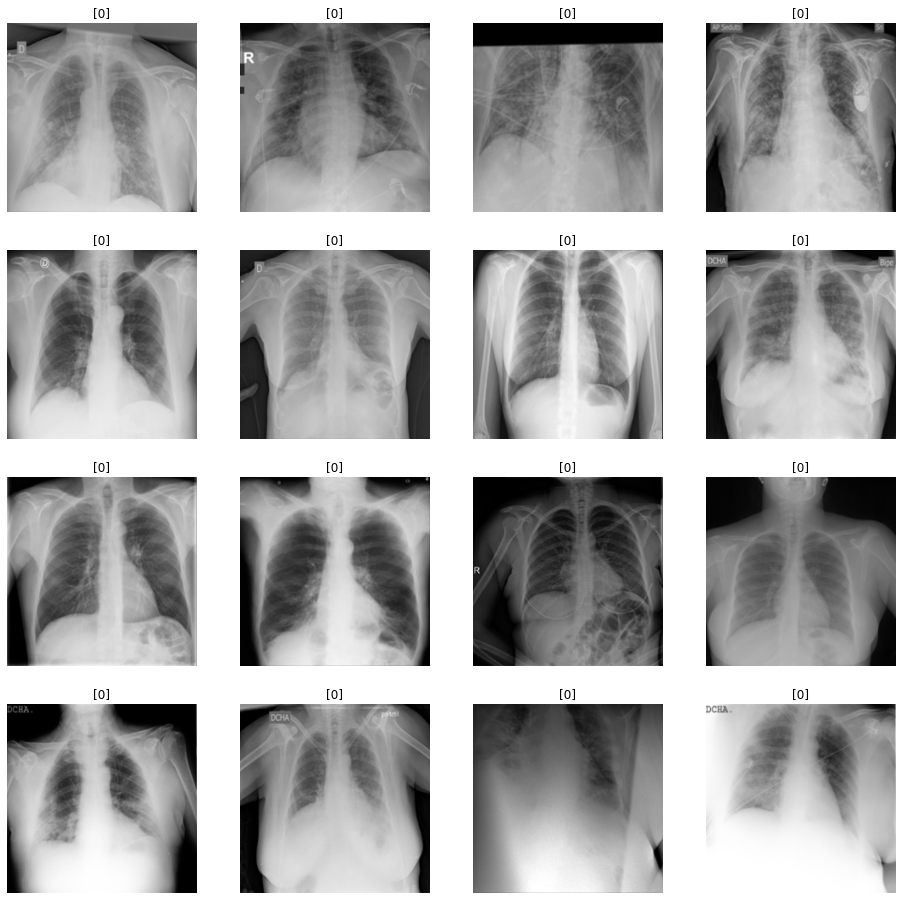

In [27]:
def plotImagesAndLabels():
    all_labels = np.unique(y_val)
    t_x, t_y = X_val, y_val
    fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
    for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
        #print([n_class for n_class, n_score in zip(all_labels, c_y) if n_score>0.5])
        c_ax.imshow(c_x[:,:,0], cmap = 'gray', vmin = 0, vmax = 255)
        c_ax.set_title(c_y)
        c_ax.axis('off')
plotImagesAndLabels()

 # Augmentation

In [13]:
import albumentations as A
COUNT_TEST = 1
COUNT_TRAIN = 1
COUNT_VAL = 1
## DO NOT RUN
#### Test dataset resizing only.
# for img, y in zip(image_test, image_label_test):
#   # img = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
#   y_str = str(y[0])
#   resizeTransform = A.Compose([A.Resize(height=160, width=160, interpolation=1)], p=1)
#   new_img = resizeTransform(image = img)['image']
#   folder_to_save_img = "Images/Test"
#   name_of_augmented_file = f"{COUNT_TEST}.jpg"
#   cv2.imwrite(f"{folder_to_save_img}/{y_str}/{name_of_augmented_file}", new_img)
#   COUNT_TEST+=1


#### Valid dataset imbalanced, Every image is resized and saved + Every image is augmented and saved
#### First point of view, Valid dataset isn't touched like the test, but can be augmented unlike test.
#### Second point of view, Valid dataset can be combined with train dataset then reshuffled to train and validation so both sources 
#### -are united.
print("Done Testing")

for img, y in zip(X_val, y_val): #Imbalanced: image_val, image_label_val, Balanced: X_val, y_val
  y_str = str(y[0])
  for i in range(2):
    resizeTransform = A.Compose([A.Resize(height=160, width=160, interpolation=1)], p=1)
    new_img = resizeTransform(image = img)['image']
    transform = A.Compose([
      A.ImageCompression(quality_lower = 92, quality_upper=100, p=0.7),
      A.GaussNoise(p=0.1),
      A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, always_apply=False, p=0.5),
      A.Flip(p = 0.4),
      A.OneOf([
        A.GaussianBlur(blur_limit=(1,3), sigma_limit=0, p=0.7),
        A.MedianBlur(blur_limit=(1,3), always_apply=False, p=0.3),
      ], p = 0.6),
      A.OneOf([
        A.Rotate(limit=180, interpolation=1, border_mode=4, always_apply=False, p=0.7),
        A.Rotate(limit=180, interpolation=1, border_mode=0, always_apply=False, p=0.3),
      ], p = 0.7),
      A.OneOf([
        A.Affine(scale = 1.4, translate_percent= None,shear = None, p=0.5),
        A.Affine(scale = None,translate_percent= 0.1, shear = None, p=0.25),
        A.Affine(scale = None,translate_percent= None,shear = (10,10), p=0.25), 
      ], p = 0.5),  
    ], 
    p = 0.9)

    aug = transform(image = new_img)["image"] 
    folder_to_save_img = "Images/BALANCED/Valid"
    name_of_augmented_file = f"{COUNT_VAL}.jpg"
    if i == 0:
      image_to_save = new_img
    else:
      image_to_save = aug
    cv2.imwrite(f"{folder_to_save_img}/{y_str}/{name_of_augmented_file}", image_to_save)
    COUNT_VAL+=1
print("Done Validation")

#### For every image, there are 2 augmented + 1 original
#### Train is imbalanced, if we used X_train, y_train then the dataset would be balanced
for img, y in zip(X_train, y_train): #Imbalanced: image_train, image_label_train, Balanced: X_train, y_train
  y_str = str(y[0])
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) NO NEED TO CONVERT BGR TO RGB
  for i in range(3):
    resizeTransform = A.Compose([A.Resize(height=160, width=160, interpolation=1)], p=1)
    new_img = resizeTransform(image = img)['image']
    transform = A.Compose([
      A.ImageCompression(quality_lower = 80, quality_upper=100, p=0.7),
      A.GaussNoise(p=0.1),
      A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, always_apply=False, p=0.5),
      A.Flip(p = 0.4),
      A.OneOf([
        A.GaussianBlur(blur_limit=(1,3), sigma_limit=0, p=0.7),
        A.MedianBlur(blur_limit=(1,3), always_apply=False, p=0.3),
      ], p = 0.6),
      A.OneOf([
        A.Rotate(limit=180, interpolation=1, border_mode=4, always_apply=False, p=0.7),
        A.Rotate(limit=180, interpolation=1, border_mode=0, always_apply=False, p=0.3),
      ], p = 0.7),
      A.OneOf([
        A.Affine(scale = 1.4, translate_percent= None,shear = None, p=0.5),
        A.Affine(scale = None,translate_percent= 0.1, shear = None, p=0.25),
        A.Affine(scale = None,translate_percent= None,shear = (10,10), p=0.25), 
      ], p = 0.5),  
    ], 
    p = 0.9)

    aug = transform(image = new_img)["image"] 
    folder_to_save_img = "Images/BALANCED/Train"
    name_of_augmented_file = f"{COUNT_TRAIN}.jpg"
    if i == 0:
      image_to_save = new_img
    else:
      image_to_save = aug
    cv2.imwrite(f"{folder_to_save_img}/{y_str}/{name_of_augmented_file}", image_to_save)
    COUNT_TRAIN+=1
print("Done Training")

Done Testing
Done Validation
Done Training


# Number of elements in each class after the augmentation 

### BALANCED BOTH

In [14]:
sum = 0
for i in range(5):
    sum = sum + len(os.listdir(f'Images/BALANCED/Train/{i}'))
    print(f'{i}: ')
    print(len(os.listdir(f'Images/BALANCED/Train/{i}')))
print(f'total: {sum}')

0: 
7536
1: 
7536
2: 
7536
3: 
7536
4: 
7536
total: 37680


In [15]:
sum = 0
for i in range(5):
    sum = sum + len(os.listdir(f'Images/BALANCED/Valid/{i}'))
    print(f'{i}: ')
    print(len(os.listdir(f'Images/BALANCED/Valid/{i}')))
print(f'total: {sum}')

0: 
1672
1: 
1672
2: 
1672
3: 
1672
4: 
1672
total: 8360


### IMBALANCED DATASET (BOTH TRAIN AND VALID)

In [12]:
sum = 0
for i in range(5):
    sum = sum + len(os.listdir(f'Images/IMBALANCED/Train/{i}'))
    print(f'{i}: ')
    print(len(os.listdir(f'Images/IMBALANCED/Train/{i}')))
print(f'total: {sum}')

0: 
7536
1: 
10821
2: 
18345
3: 
13314
4: 
8814
total: 58830


In [16]:
sum = 0
for i in range(5):
    sum = sum + len(os.listdir(f'Images/IMBALANCED/Valid/{i}'))
    print(f'{i}: ')
    print(len(os.listdir(f'Images/IMBALANCED/Valid/{i}')))
print(f'total: {sum}')

0: 
1672
1: 
2404
2: 
4076
3: 
2958
4: 
1958
total: 13068
